# 05 - Plotting Rockefeller and UTSW Together

## Imports

In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import avn.dataloading as dataloading
import avn.segmentation as segmentation
import avn.plotting
import math
import sklearn
import seaborn as sns

c:\Users\tkoch\anaconda3\envs\fresh_avn_dev\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Onsets

In [2]:
rock_seg_metrics = pd.read_csv('C:\\Grad_School\\Code_and_software\\Py_code\\WhisperSeg_validation\\wseg_RMSE_tweety_F1s_rock.csv')
rock_seg_metrics['Colony'] = 'Rockefeller'
utsw_seg_metrics = pd.read_csv('C:\\Grad_School\\Code_and_software\\Py_code\\WhisperSeg_validation\\wseg_RMSE_tweety_F1s.csv')
utsw_seg_metrics['Colony'] = 'UTSW'

all_seg_metrics = pd.concat([utsw_seg_metrics, rock_seg_metrics])

In [3]:
all_seg_metrics = all_seg_metrics[all_seg_metrics.max_gap == 0.01]

In [4]:
all_seg_metrics.method = pd.Categorical(all_seg_metrics.method).reorder_categories(['RMSE', 'Tweety_net', 'whisper_seg'])
all_seg_metrics.method = all_seg_metrics.method.cat.rename_categories({'Tweety_net' : "TweetyNet", 
                                                                       'whisper_seg' : "WhisperSeg"})

In [5]:
plt.rcParams.update({'font.size': 10})

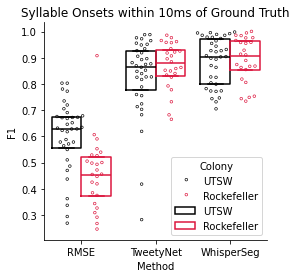

In [6]:
plt.figure(figsize = (4, 4))
sns.swarmplot(data = all_seg_metrics, x = 'method', y = 'F1', hue = 'Colony', s = 5, marker = "$\circ$",
             dodge = True, palette = ['black', 'crimson'])
sns.boxplot(data = all_seg_metrics, x = 'method', y = 'F1', hue = 'Colony', fill = False, fliersize=0, whis = 0, 
            palette = ['black', 'crimson'])
plt.title("Syllable Onsets within 10ms of Ground Truth")
plt.xlabel('Method')
sns.despine()

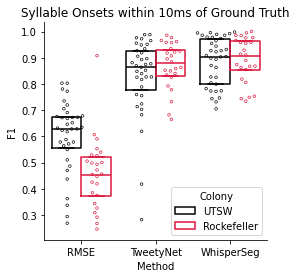

In [7]:
plt.figure(figsize = (4, 4))
sns.swarmplot(data = all_seg_metrics, x = 'method', y = 'F1', hue = 'Colony', s = 5, marker = "$\circ$",
             dodge = True, legend = False, palette = ['black', 'crimson'])
sns.boxplot(data = all_seg_metrics, x = 'method', y = 'F1', fill = False, hue = 'Colony', fliersize=0, whis = 0, 
            palette = ['black', 'crimson'])
plt.title("Syllable Onsets within 10ms of Ground Truth")
plt.xlabel('Method')
sns.despine()
#plt.savefig('syll_onset_f1_ut&rock.svg', transparent = True)

In [16]:
plt.rcParams.update({'font.size': 18})

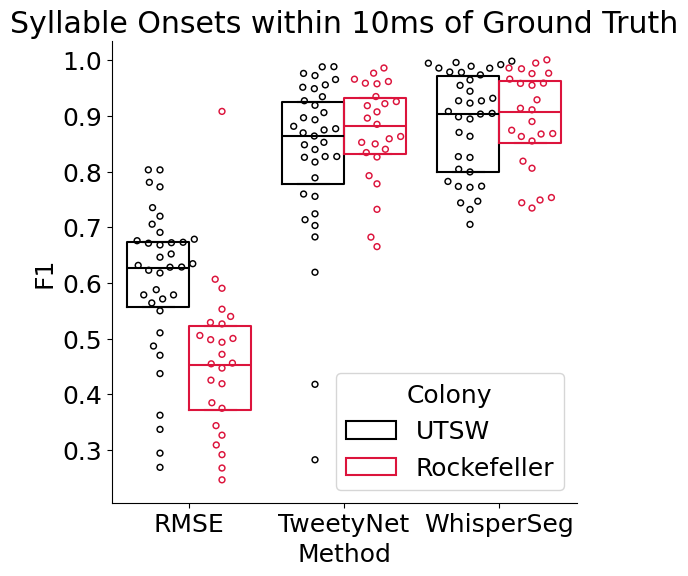

In [18]:
plt.figure(figsize = (6, 6))
sns.swarmplot(data = all_seg_metrics, x = 'method', y = 'F1', hue = 'Colony', s = 8, marker = "$\circ$",
             dodge = True, legend = False, palette = ['black', 'crimson'])
sns.boxplot(data = all_seg_metrics, x = 'method', y = 'F1', fill = False, hue = 'Colony', fliersize=0, whis = 0, 
            palette = ['black', 'crimson'])
plt.title("Syllable Onsets within 10ms of Ground Truth")
plt.xlabel('Method')
sns.despine()
plt.savefig('poster_syll_onset_f1_ut&rock.svg', transparent = True)

## Counting labeled .wav files

In [8]:
import glob


In [9]:
all_wav = glob.glob('D:\\Final_Bird_Dataset\\FP1_project_birds\\labeled_songs\\*\\*.wav')

In [10]:
len(all_wav)

1083